In [37]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
from __future__ import unicode_literals
import matplotlib.pyplot as plt
import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.rc('svg', fonttype = 'svgfont')
#matplotlib.rc('font', family='Arial')

In [2]:
import sys
import platform
import matplotlib
print("Operating System " + platform.system() + " " + platform.release())
print("Python Version " + str(sys.version))
print("Pandas Version " + str(pd.__version__))
print("Numpy Version " + str(np.__version__))
print("Matplotlib Version " + str(matplotlib.__version__))

Operating System Windows 7
Python Version 2.7.8 (default, Jun 30 2014, 16:03:49) [MSC v.1500 32 bit (Intel)]
Pandas Version 0.17.0
Numpy Version 1.9.3
Matplotlib Version 1.4.3


In [3]:
dataroot = "E:\\PROJECTS\\UMAR\\Data\\chem\\"

# Pumping

In [4]:
pumping = pd.read_excel(dataroot + "MillvilleMaster.xlsx","PumpingSchedule")

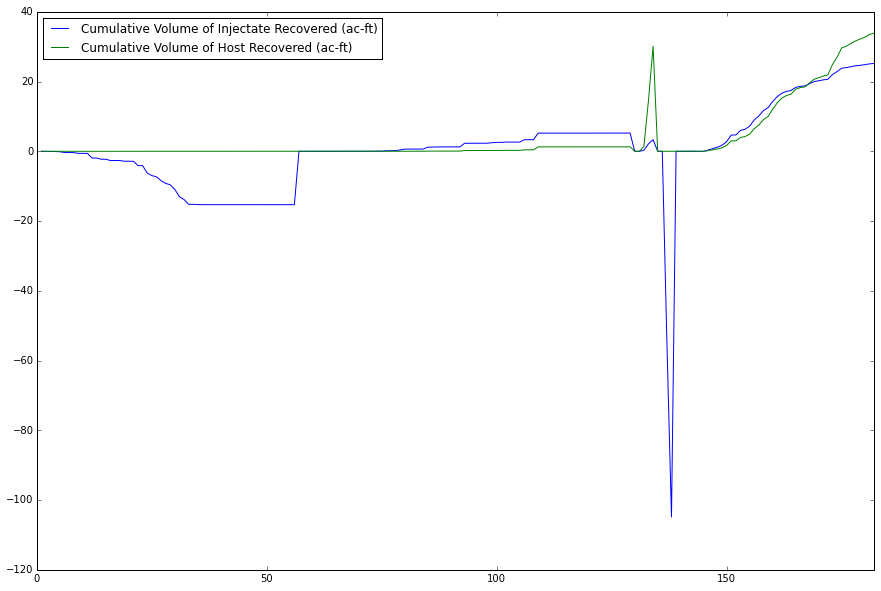

In [5]:
fig = plt.figure()
pumping[['Cumulative Volume of Injectate Recovered (ac-ft)','Cumulative Volume of Host Recovered (ac-ft)']].plot(kind='line')


In [6]:
pumping.reset_index(inplace=True)
pumping.set_index('Date-time',inplace=True)
pump = pumping.resample('1H')
pump = pump.interpolate(method='time')
pump = pump.resample('1D')

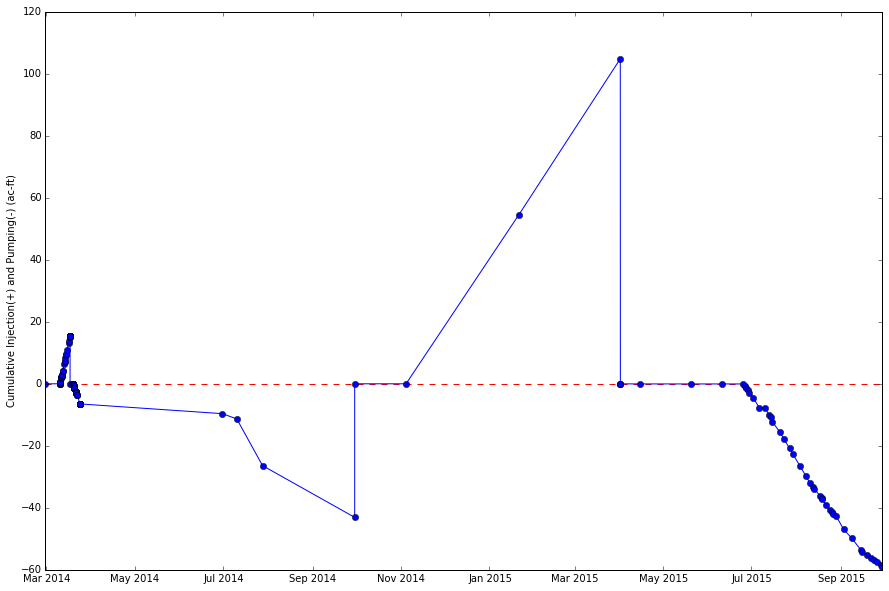

In [7]:
x = pumping.index
y = pumping['Percent GR Water']
y1 = pumping['Total Water Injected (acre-ft)']
plt.figure()
plt.plot(x,y1,'bo-')
plt.ylabel('Cumulative Injection(+) and Pumping(-) (ac-ft)')
plt.hlines(y=0,xmin=min(x),xmax=max(x),linestyles='dashed',colors='red')

# Chemistry

In [8]:
chem = pd.read_excel(dataroot + "AquachemOut.xlsx",'small')

In [9]:
chem = chem.loc[:5,:]

In [10]:
chem

,Station ID,Label,Location,Latitude,Longitude,X coordinate,Y coordinate,Elevation,Well Depth,Screen depth top,...,SI (Quartz),SI (Siderite),SI (Talc),SI (Witherite),"Larson-Skold corrosion index, describes the corrosivity of water towards mild steel",Residual sodium Carbonate,Ryznar Stability Index at sample temperature,Langelier Saturation Index at sample temperature,Electro Neutrality %: (Cations-Anions)/(Cations+Anions),Calculated total organic carbon
0,UT414024111481101,Garr Spring 10/15/2014,Garr Spring,41.67297,-111.8039,433079.3,4613780,1477.934,NaN,NaN,...,0.2888,-5.7332,-1.5861,-3.1407,4.903163,-0.610756,7.732075,0.013963,0.950439,79.23516
1,UT414115111490301,Glenridge Well 10/15/2014,Glenridge Well,41.68767,-111.8181,431913.8,4615423,1427.191,1309.840,1345.200,...,0.5478,-2.0496,-4.5990,-3.1478,9.753983,-1.304581,7.824653,-0.432326,-0.615722,124.09100
2,UT414115111490301,Glenridge Well 07/16/2015,Glenridge Well,41.68767,-111.8181,431913.8,4615423,1427.191,1309.840,1345.200,...,NaN,-1.5206,NaN,-2.8222,5.995364,-0.854598,7.599713,0.000144,3.633574,96.13107
3,UT414115111490301,Glenridge Well 08/14/1989,Glenridge Well,41.68767,-111.8181,431913.8,4615423,1427.191,1309.840,1345.200,...,0.4912,NaN,-0.8795,-2.6408,3.475438,NaN,7.366620,0.116690,-0.003334,106.43860
4,UT414213111493101,Alder Well 10/31/1990,Alder Well,41.70369,-111.8265,431234.6,4617209,1381.935,1314.879,1327.071,...,0.3185,-1.6599,-4.3409,-3.4046,5.923062,-0.533872,NaN,-1000007.000000,-0.933405,60.47496
5,UT414213111493101,Alder Well 06/09/2015,Alder Well,41.70369,-111.8265,431234.6,4617209,1381.935,1314.879,1327.071,...,NaN,-1.8238,NaN,-3.1244,6.439867,-1.464693,7.519976,-0.139988,3.034055,68.87426


In [11]:
chemstats=pd.read_csv(dataroot+'PrincAquifStats.csv')

In [12]:
chemstats.reset_index(inplace=True)
chemstats.set_index('ParAbb',inplace=True)

In [13]:
chemstats.columns

Index([u'index', u'Unnamed: 0', u'qrt95', u'max', u'uqrt', u'std', u'cnt',
       u'min', u'median', u'range', u'qrt5', u'lqrt', u'mean'],
      dtype='object')

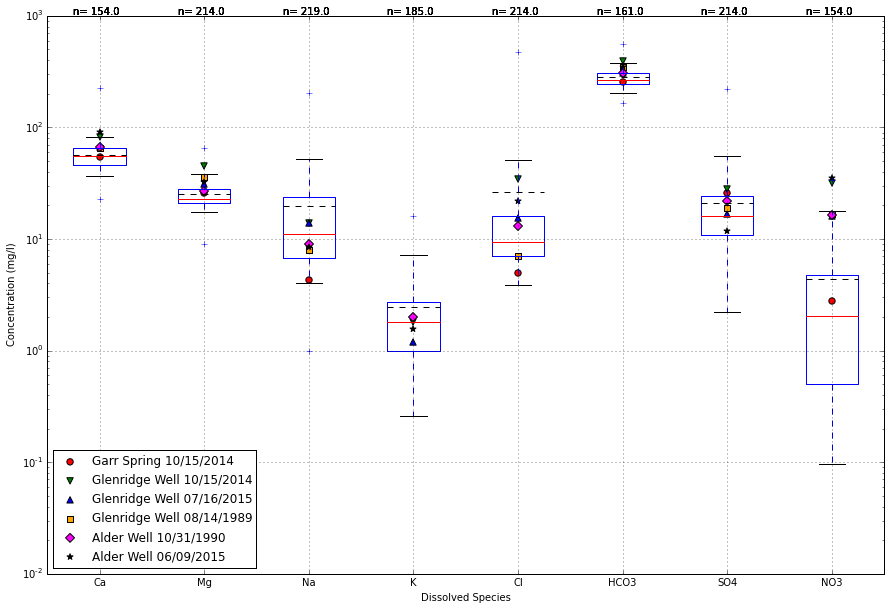

In [14]:
chemlist = ['Ca','Mg','Na','K','Cl','HCO3','SO4','NO3']
#http://matplotlib.org/examples/statistics/bxp_demo.html
#whislo,whisi,q1,q3,mean,med,label = [],[],[],[],[],[],

fig = plt.figure('Statistics of Principal Aquifer Chemistry')
ax = fig.add_subplot(111)


di = []

for i in chemlist:
    di.append({'label':i, 'mean':chemstats.loc[i,'mean'],'med':chemstats.loc[i,'median'],
               'q1':chemstats.loc[i,'lqrt'],'q3':chemstats.loc[i,'uqrt'],'whislo':chemstats.loc[i,'qrt5'],
               'whishi':chemstats.loc[i,'qrt95'], 'fliers':[chemstats.loc[i,'min'],chemstats.loc[i,'max']]})
        
#data = [np.concatenate((spread[i], center[i], flier_high[i], flier_low[i]), 0) for i in range(len(chemlist))] 

di[0]

colors = ['red','green','blue','orange','magenta','black']
markers = ['o','v','^','s','D','*']
ax.bxp(di,meanline=True,showmeans=True)

#ax.semilogy()
#plt.legend()
for i in range(1,8):
    for j in range(len(chem)):
        ax.scatter(i+1,chem.loc[j,chemlist[i]],c=colors[j],marker=markers[j],s=40)
        ax.text(i+0.75,1015,'n= ' + str(chemstats.loc[chemlist[i],'cnt']))
        ax.semilogy()
for j in range(len(chem)):
    ax.scatter(1,chem.loc[j,chemlist[0]],label=chem.loc[j,'Label'],c=colors[j],marker=markers[j],s=40)
    ax.text(0.75,1015,'n= ' + str(chemstats.loc[chemlist[i],'cnt']))
    ax.semilogy()
ax.legend(scatterpoints=1,loc=3)
ax.grid()
plt.xlabel('Dissolved Species')
plt.ylabel('Concentration (mg/l)')
plt.savefig(dataroot+'PrincBoxWhisker.pdf')
plt.savefig(dataroot+'PrincBoxWhisker.svg')
#for j in range(len(chem)):

In [15]:
d = {'Ca':0.04990269, 'Mg':0.082287595, 'Na':0.043497608, 'K':0.02557656, 'Cl':0.028206596, 'HCO3':0.016388838, 'CO3':0.033328223, 'SO4':0.020833333, 
     'NO2':0.021736513, 'NO3':0.016129032}
chemlist = ['Ca','Mg','Na','K','Cl','HCO3','SO4','NO3']

for i in chemlist:
    if i in chem.columns:
        chem[i+'Meq'] = chem.loc[:,i] * d[i]
#chem['NaKMeq'] = chem['NaMeq']+chem['KMeq']


In [16]:
chem.loc[:,['Label','Ca','Mg','Na','Cl','K','SO4','HCO3','NO3']]

,Label,Ca,Mg,Na,Cl,K,SO4,HCO3,NO3
0,Garr Spring 10/15/2014,54.1,25.6,4.29,4.9446,NaN,26.071,256.00000,2.767
1,Glenridge Well 10/15/2014,81.5,44.9,14.00,34.2270,1.82,28.058,394.00000,31.829
2,Glenridge Well 07/16/2015,66.5,31.4,14.00,15.3000,1.19,16.700,308.00000,16.114
3,Glenridge Well 08/14/1989,66.0,36.0,7.90,7.1000,NaN,19.000,350.01812,16.822
4,Alder Well 10/31/1990,67.0,27.0,9.00,13.0000,2.00,22.000,307.00000,16.556
5,Alder Well 06/09/2015,91.2,32.2,8.47,21.8000,1.55,11.800,350.00000,35.104


In [17]:
chem.loc[:,['Label','CaMeq','MgMeq','NaMeq','ClMeq','SO4Meq','HCO3Meq','NO3Meq']]

,Label,CaMeq,MgMeq,NaMeq,ClMeq,SO4Meq,HCO3Meq,NO3Meq
0,Garr Spring 10/15/2014,2.699736,2.106562,0.186605,0.139470,0.543146,4.195543,0.044629
1,Glenridge Well 10/15/2014,4.067069,3.694713,0.608967,0.965427,0.584542,6.457202,0.513371
2,Glenridge Well 07/16/2015,3.318529,2.583830,0.608967,0.431561,0.347917,5.047762,0.259903
3,Glenridge Well 08/14/1989,3.293578,2.962353,0.343631,0.200267,0.395833,5.736390,0.271323
4,Alder Well 10/31/1990,3.343480,2.221765,0.391478,0.366686,0.458333,5.031373,0.267032
5,Alder Well 06/09/2015,4.551125,2.649661,0.368425,0.614904,0.245833,5.736093,0.566194


In [18]:
d = {'Ca':0.04990269, 'Mg':0.082287595, 'Na':0.043497608, 'K':0.02557656, 'Cl':0.028206596, 'HCO3':0.016388838, 'CO3':0.033328223, 'SO4':0.020833333, 
     'NO2':0.021736513, 'NO3':0.016129032}
chemlist = ['Ca','Mg','Na','Cl','SO4','HCO3','NO3']

y = []
for i in chemlist:
    y.append(chemstats.loc[i,'median']*d[i])


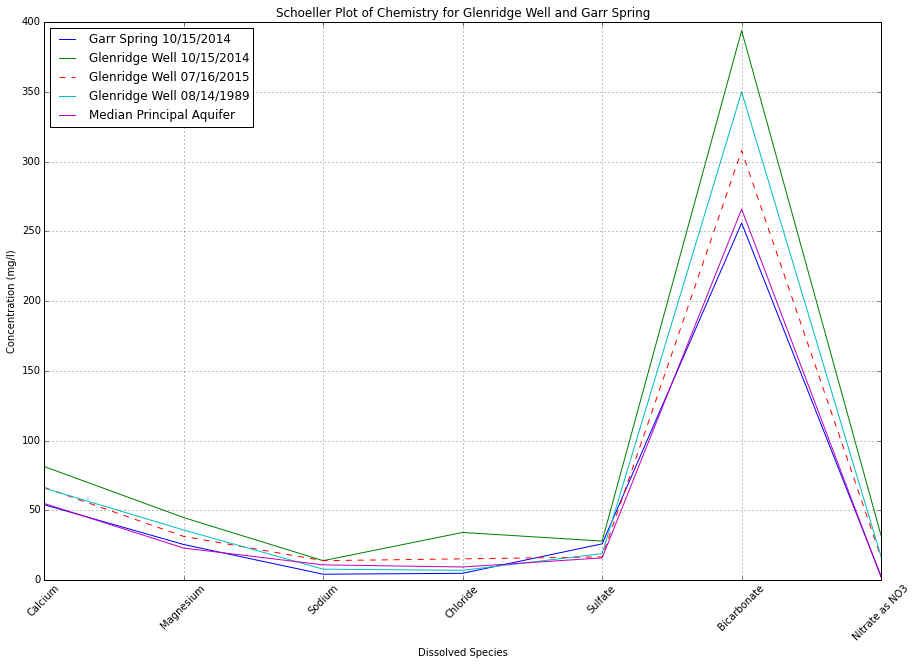

In [39]:
chem.loc[0,['Ca','Mg','Na','Cl','SO4','HCO3','NO3']].plot(label=chem.loc[0,'Label'])
chem.loc[1,['Ca','Mg','Na','Cl','SO4','HCO3','NO3']].plot(label=chem.loc[1,'Label'])
chem.loc[2,['Ca','Mg','Na','Cl','SO4','HCO3','NO3']].plot(label=chem.loc[2,'Label'],style='--')
chem.loc[3,['Ca','Mg','Na','Cl','SO4','HCO3','NO3']].plot(label=chem.loc[3,'Label'])

plt.plot([0,1,2,3,4,5,6],chemstats.loc[['Ca','Mg','Na','Cl','SO4','HCO3','NO3'],'median'],label='Median Principal Aquifer')

plt.legend(loc=2)
plt.grid()
plt.ylabel('Concentration (mg/l)')
plt.xlabel('Dissolved Species')
plt.xticks(range(7),['Calcium','Magnesium','Sodium','Chloride','Sulfate','Bicarbonate',u'Nitrate as NO3'],rotation=45)
#plt.yscale('log')
plt.title('Schoeller Plot of Chemistry for Glenridge Well and Garr Spring')
plt.savefig(dataroot+'GRSchoeller.pdf')
plt.savefig(dataroot+'GRSchoeller.svg')

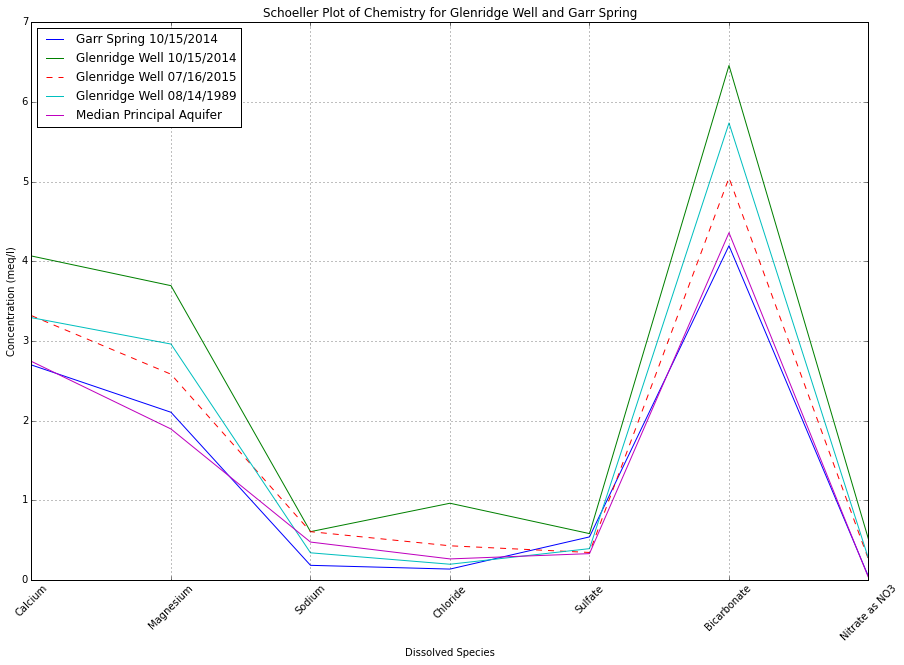

In [40]:
chem.loc[0,['CaMeq','MgMeq','NaMeq','ClMeq','SO4Meq','HCO3Meq','NO3Meq']].plot(label=chem.loc[0,'Label'])
chem.loc[1,['CaMeq','MgMeq','NaMeq','ClMeq','SO4Meq','HCO3Meq','NO3Meq']].plot(label=chem.loc[1,'Label'])
chem.loc[2,['CaMeq','MgMeq','NaMeq','ClMeq','SO4Meq','HCO3Meq','NO3Meq']].plot(label=chem.loc[2,'Label'],style='--')
chem.loc[3,['CaMeq','MgMeq','NaMeq','ClMeq','SO4Meq','HCO3Meq','NO3Meq']].plot(label=chem.loc[3,'Label'])
plt.plot([0,1,2,3,4,5,6],y,label='Median Principal Aquifer')
plt.legend(loc=2)
plt.grid()
plt.ylabel('Concentration (meq/l)')
plt.xlabel('Dissolved Species')
plt.xticks(range(7),['Calcium','Magnesium','Sodium','Chloride','Sulfate','Bicarbonate','Nitrate as NO3'],rotation=45)
#plt.yscale('log')
plt.title('Schoeller Plot of Chemistry for Glenridge Well and Garr Spring')
plt.savefig(dataroot+'GRSchoellerMeq.pdf')
plt.savefig(dataroot+'GRSchoellerMeq.svg')

## Nitrate 

In [32]:
nitrate = pd.read_excel(dataroot + "MillvilleMaster.xlsx","NitrateOverTime")

In [33]:
nitrate.reset_index(inplace=True)
nitrate.sort(columns=['Source','SampleDate'], inplace=True)
nitrate.set_index(['SampleDate'], inplace=True)
del(nitrate['index'])

c:\python27\arcgis10.3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


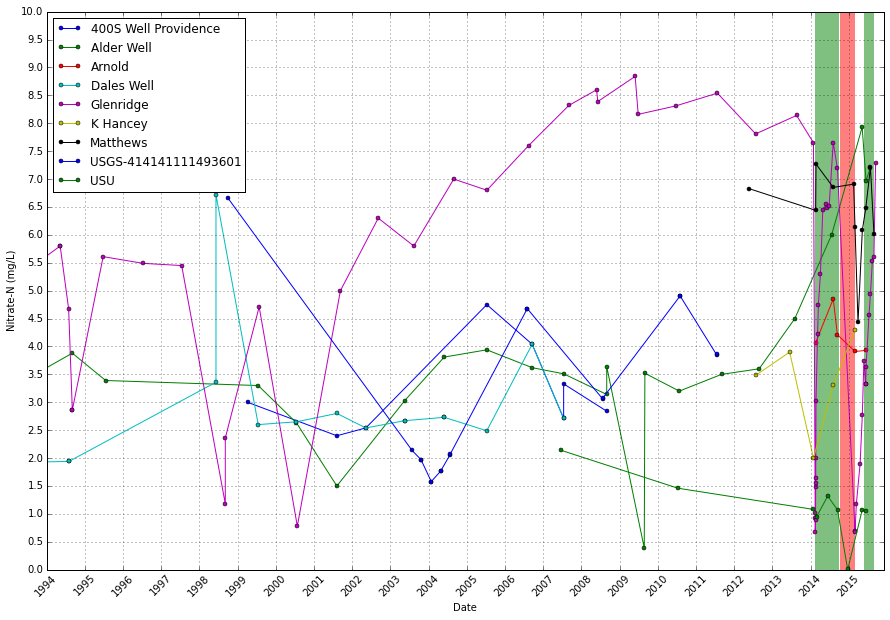

In [24]:
for key, grp in nitrate.groupby('Source'):
    plt.plot(grp.index, grp['ResultValue'],'-o',label=key, markersize=4) 
    plt.legend(loc='best')
plt.xlim('1/1/1995','1/1/2016')
plt.xlabel('Date')
plt.ylabel('Nitrate-N (mg/L)')
plt.ylim(0,10)

# Inject
## Phase I
a = '3/10/2014 11:02'
b = '3/19/2014 9:15'
## Phase II
c = '11/4/2014  11:16'
d = '4/1/2015 10:47'

# Pump
a1 = '3/19/2014 10:18'
b1 = '10/31/2014 0:00'
c1 = '6/25/2015 9:00'
d1 = '10/1/2015 0:00'

fmt = '%m/%d/%Y %H:%M'
a1 = datetime.datetime.strptime(a1,fmt)
b1 = datetime.datetime.strptime(b1,fmt)
c1 = datetime.datetime.strptime(c1,fmt)
d1 = datetime.datetime.strptime(d1,fmt)

a = datetime.datetime.strptime(a,fmt)
b = datetime.datetime.strptime(b,fmt)
c = datetime.datetime.strptime(c,fmt)
d = datetime.datetime.strptime(d,fmt)


plt.axvspan(a, b, color='r', alpha=0.5, lw=0)
plt.axvspan(c, d, color='r', alpha=0.5, lw=0)
plt.axvspan(a1, b1, color='g', alpha=0.5, lw=0)
plt.axvspan(c1, d1, color='g', alpha=0.5, lw=0)

plt.yticks(np.arange(0,10.5,0.5))
plt.xticks(pd.date_range('1/1/1994', '1/1/2016', freq='12M'),rotation=45)
plt.grid()

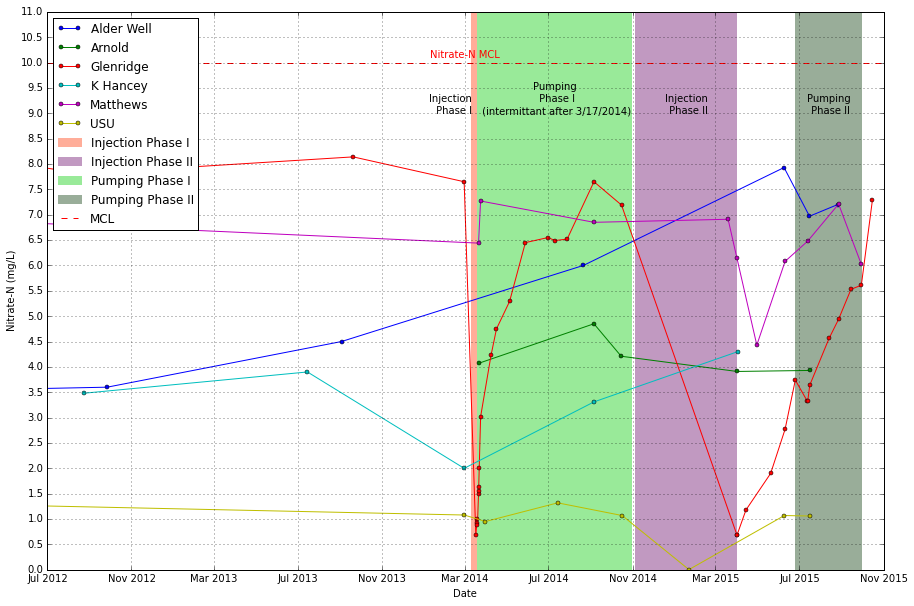

In [35]:
import datetime
for key, grp in nitrate.groupby('Source'):
    if grp.index.max() > datetime.datetime(2015,1,1):
        plt.plot(grp.index, grp['ResultValue'],'-o',label=key, markersize=4)

ly = 9.0
tmin = datetime.datetime.strptime('7/1/2012','%m/%d/%Y')
tmax = datetime.datetime.strptime('11/1/2015','%m/%d/%Y')

plt.axvspan(a, b, color='#FF3300', alpha=0.4, lw=0, label= 'Injection Phase I')
plt.axvspan(c, d, color='#660066', alpha=0.4, lw=0, label= 'Injection Phase II')
plt.axvspan(a1, b1, color='#00CC00', alpha=0.4, lw=0, label='Pumping Phase I')
plt.axvspan(c1, d1, color='#003300', alpha=0.4, lw=0, label='Pumping Phase II')
plt.text(a, ly, 'Injection \n Phase I', horizontalalignment='right')
plt.text(a1 + (b1 - a1)/2, ly, 'Pumping \n Phase I \n (intermittant after 3/17/2014)', horizontalalignment='center')
plt.text(c1 + (d1 - c1)/2, ly, 'Pumping \n Phase II', horizontalalignment='center')
plt.text(c + (d - c)/2, ly, 'Injection \n Phase II', horizontalalignment='center')
plt.text(tmin + (tmax-tmin)/2, 10.1, 'Nitrate-N MCL', color='red', horizontalalignment='center')
plt.xlim(tmin,tmax)
plt.xlabel('Date')
plt.ylabel('Nitrate-N (mg/L)')
#plt.xticks(pd.date_range(tmin, tmax, freq='2M').to_datetime(),rotation=45)
plt.hlines(10,'7/1/2012', '11/1/2015', color='red', label='MCL', linestyles='dashed')
plt.ylim(0,10.5)
plt.yticks(np.arange(0,11.5,0.5))
plt.legend(loc=2)
plt.grid(which='both')
plt.savefig('C:\Users\PAULINKENBRANDT\Google Drive\WORK\Millville\Writing\Year 2\Figures\NitrateShorterm.pdf')
plt.savefig('C:\Users\PAULINKENBRANDT\Google Drive\WORK\Millville\Writing\Year 2\Figures\NitrateShorterm.svg')

In [26]:
def fcl(df, dtObj):
    '''
    finds closest date index in a dataframe to a date object
    
    df = dataframe
    dtObj = date object
    
    taken from: http://stackoverflow.com/questions/15115547/find-closest-row-of-dataframe-to-given-time-in-pandas
    '''
    return df.iloc[np.argmin(np.abs(df.index.to_pydatetime() - dtObj))]

In [27]:
nitrate.reset_index(inplace=True)
nitrate.drop_duplicates(subset=['Source','SampleDate'], inplace=True)

In [28]:
nit = nitrate.pivot(index='SampleDate', columns='Source', values='ResultValue')
nit = nit[nit.index > datetime.datetime(2014,1,1)]
nit = nit.resample('15min')
nit = nit.interpolate(method='time')


In [29]:
del(pum)

NameError: name 'pum' is not defined

In [ ]:
def statusR(x):
    if x == 'Storage':
        return 0
    elif x=='Injection':
        return -1
    else:
        return 1

In [140]:
pum = pd.read_excel(dataroot + "MillvilleMaster.xlsx","PumpingRaw", index_col=0)
pum['statusInt'] = pum['status'].apply(lambda x: statusR(x),1)

In [141]:
pum
pum['timeDelta'] = pum.index.diff()

c:\python27\arcgis10.3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: diff is deprecated. Use difference instead
  if __name__ == '__main__':


TypeError: difference() takes exactly 2 arguments (1 given)

In [110]:
pum1 = pum.resample('15min')
pum1 = pum1.loc[:,'readingGal'].to_frame()
pum2 = pum[['statusInt','phase']].resample('15min',fill_method='ffill')
pum1 = pum1.interpolate(method='time')
pum = pd.merge(pum1, pum2, left_index=True, right_index=True,how='outer')

In [113]:
def statusStr(x):
    if x>0:
        return 'pumping'
    if x<0:
        return 'injection'
    else:
        return 'storage'
pum['status'] = pum['statusInt'].apply(lambda x: statusStr(x),1)

In [ ]:
concat([numeric,datelike],axis=1)

In [126]:
nitpum = pd.merge(nit, pum, left_index=True, right_index=True,how='outer')

In [116]:
nitpum.columns

Index([u'400S Well Providence',           u'Alder Well',
                     u'Arnold',           u'Dales Well',
                  u'Glenridge',             u'K Hancey',
                   u'Matthews', u'USGS-414141111493601',
                        u'USU',           u'readingGal',
                  u'statusInt',                u'phase',
                     u'status'],
      dtype='object', name=u'Source')

In [117]:
def injVSpump(x):
    if x[1] == 'injection':
        return x[0]*-1
    else:
        return x[0]

In [127]:
nitpum['deltaGal'] = nitpum['readingGal'].diff()
nitpum['deltaGal'] = nitpum[['deltaGal','status']].apply(lambda x: injVSpump(x),1)

In [135]:
nitpum.tail(3)

Source,400S Well Providence,Alder Well,Arnold,Dales Well,Glenridge,K Hancey,Matthews,USGS-414141111493601,USU,readingGal,statusInt,phase,status,deltaGal,pumpingRateGPM
2015-10-29 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431515000,1,2,pumping,0,0
2015-10-29 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431515000,1,2,pumping,0,0
2015-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431515000,1,2,pumping,0,0


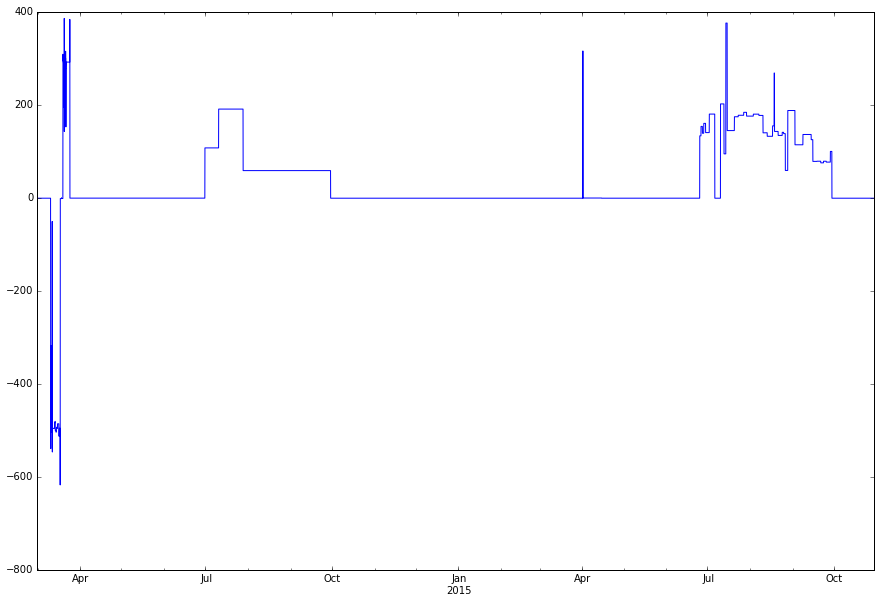

In [136]:
nitpum['pumpingRateGPM'] = nitpum['deltaGal']/15.0
nitpum['pumpingRateGPM'].plot()

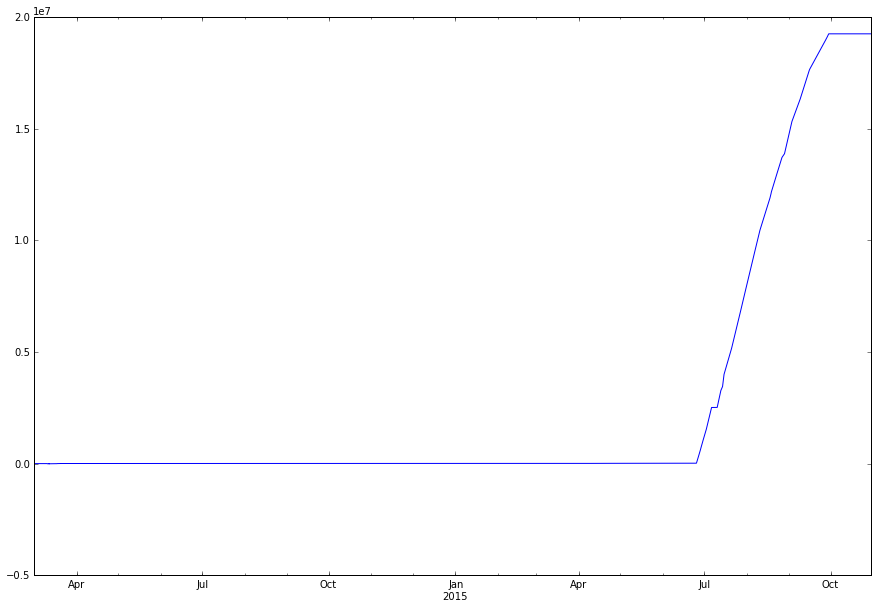

In [134]:
v = nitpum['statusInt'].dropna()
grouper = (nitpum['phase']==1).cumsum()
nitpum.groupby(grouper)['deltaGal'].cumsum().plot()

In [ ]:
result.plot()

In [ ]:
pumping['nitrates'] = pumping.index.apply(lambda x: fcl(nitrate, x),1)